<a href="https://colab.research.google.com/github/atlas-github/nih_text_mining_and_analytics/blob/main/principal_component_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principal Component Analysis


Principal Component Analysis (PCA) is a dimensionality reduction technique used to simplify complex datasets while preserving most of the important information. It achieves this by transforming the original features into a new set of orthogonal (uncorrelated) variables called principal components. These principal components are ordered in such a way that the first component explains the maximum variance in the data, the second component explains the maximum variance after accounting for the first component, and so on.

## Example

Consider a sample dataset below, and the objective is to reduce the dimensionality of this dataset using PCA.

### 1. Data Preprocessing

First, we standardize the data to ensure that all features have mean zero and unit variance. This step is crucial because PCA is sensitive to the scale of the features.

In [ ]:
import seaborn as sns
import pandas as pd

iris = sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
iris.to_csv("iris.csv")

from google.colab import files
files.download("iris.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#drop the last column
df = iris.drop(columns=iris.columns[-1])
df

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
import pandas as pd

# Create the dataframe
data = {
    'X1': [1, 2, 3, 4, 5],
    'X2': [2, 3, 4, 5, 6],
    'X3': [3, 4, 5, 6, 7]
}

df = pd.DataFrame(data)
df

,X1,X2,X3
0,1,2,3
1,2,3,4
2,3,4,5
3,4,5,6
4,5,6,7


In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize the dataframe
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df)

# Convert the standardized array back to a dataframe
df_standardized = pd.DataFrame(df_standardized, columns=df.columns)
df_standardized

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


### 2. Covariance Matrix Calculation

Next, we calculate the covariance matrix of the standardized data. The covariance matrix shows how each feature varies with respect to every other feature in the dataset.

In [ ]:
# Calculate the covariance matrix
cov_matrix = df_standardized.cov()
cov_matrix

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.006711,-0.118359,0.877604,0.823431
sepal_width,-0.118359,1.006711,-0.431316,-0.368583
petal_length,0.877604,-0.431316,1.006711,0.969328
petal_width,0.823431,-0.368583,0.969328,1.006711


### 3. Eigendecomposition

We perform eigendecomposition on the covariance matrix to obtain the eigenvectors and eigenvalues. Eigenvectors represent the directions of maximum variance in the data, and eigenvalues indicate the magnitude of variance along each eigenvector.

In [ ]:
import numpy as np

# Perform eigendecomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Print the eigenvalues and eigenvectors
print("Eigenvalues:")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors)

Eigenvalues:
[2.93808505 0.9201649  0.14774182 0.02085386]

Eigenvectors:
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


### 4. Selecting Principal Components

We rank the eigenvectors based on their corresponding eigenvalues in descending order. The eigenvector with the highest eigenvalue represents the direction of maximum variance in the data and is chosen as the first principal component (PC1). The second principal component (PC2) is the eigenvector with the second-highest eigenvalue, and so on.

In [ ]:
# Sort the eigenvalues and eigenvectors in descending order
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# Project the standardized data onto the principal components
principal_components = np.dot(df_standardized, eigenvectors)

# Convert the principal components array to a DataFrame
df_principal_components = pd.DataFrame(principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4'])

# Print the principal components
print("Principal Components:")
print(df_principal_components)

Principal Components:
          PC1       PC2       PC3       PC4
0   -2.264703 -0.480027 -0.127706  0.024168
1   -2.080961  0.674134 -0.234609  0.103007
2   -2.364229  0.341908  0.044201  0.028377
3   -2.299384  0.597395  0.091290 -0.065956
4   -2.389842 -0.646835  0.015738 -0.035923
..        ...       ...       ...       ...
145  1.870503 -0.386966  0.256274  0.389257
146  1.564580  0.896687 -0.026371  0.220192
147  1.521170 -0.269069  0.180178  0.119171
148  1.372788 -1.011254  0.933395  0.026129
149  0.960656  0.024332  0.528249 -0.163078

[150 rows x 4 columns]


### 5. Projection

Finally, we project the original data onto the new principal component space defined by the selected eigenvectors. This transformation results in a new dataset where each observation is represented by a combination of principal components rather than the original features.

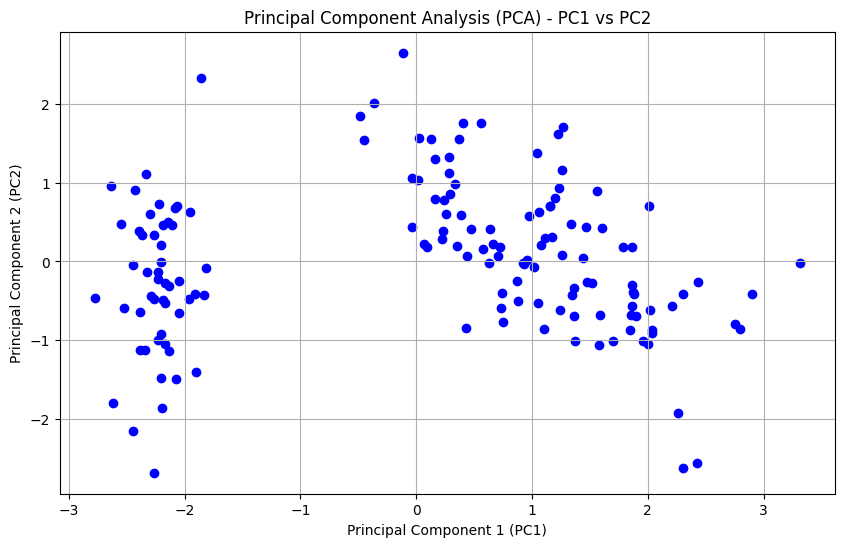

In [ ]:
import matplotlib.pyplot as plt

# Plot PC1 vs PC2
plt.figure(figsize=(10, 6))
plt.scatter(df_principal_components['PC1'], df_principal_components['PC2'], color='blue')

# Adding titles and labels
plt.title('Principal Component Analysis (PCA) - PC1 vs PC2')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')

# Adding grid
plt.grid(True)

# Show plot
plt.show()

## Scikit-learn's [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA)

In [ ]:
import numpy as np
from sklearn.decomposition import PCA

X = np.array(df_standardized)
X

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [ ]:
# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_standardized)

In [ ]:
principal_components

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

In [ ]:
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

In [ ]:
pca.explained_variance_

array([2.93808505, 0.9201649 ])

          PC1       PC2
0   -2.264703  0.480027
1   -2.080961 -0.674134
2   -2.364229 -0.341908
3   -2.299384 -0.597395
4   -2.389842  0.646835
..        ...       ...
145  1.870503  0.386966
146  1.564580 -0.896687
147  1.521170  0.269069
148  1.372788  1.011254
149  0.960656 -0.024332

[150 rows x 2 columns]


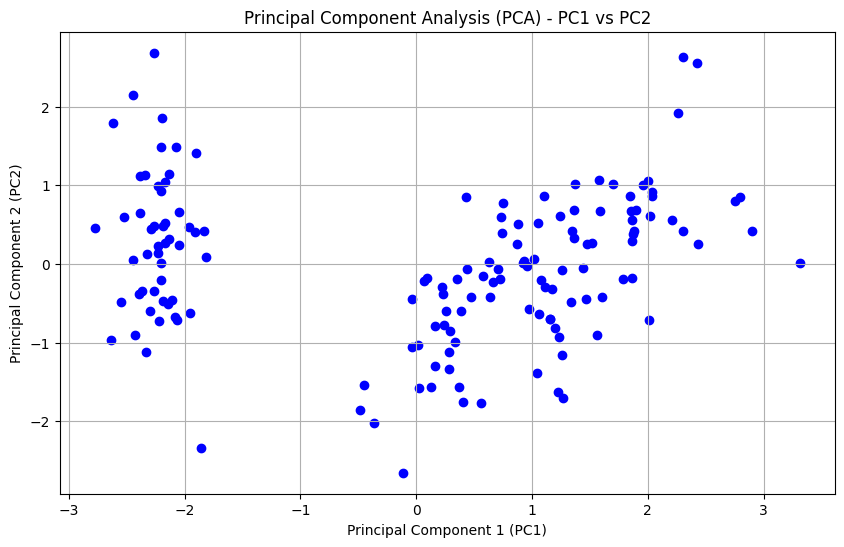

In [ ]:
# Create a DataFrame with the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Display the DataFrame with principal components
print(principal_df)

# Plot PC1 vs PC2
plt.figure(figsize=(10, 6))
plt.scatter(principal_df['PC1'], principal_df['PC2'], color='blue')

# Adding titles and labels
plt.title('Principal Component Analysis (PCA) - PC1 vs PC2')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')

# Adding grid
plt.grid(True)

# Show plot
plt.show()